In [1]:
import pandas as pd

## Note that this file is intended to be run with the data in a folder named DATA. Change the data_path below as needed.

In [2]:
data_path = "DATA/GallupGenZ.csv"
GenZ = pd.read_csv(data_path)

# Cleaning the data for Family Values

### Output is new_df

In [3]:
# The number the question is at is the row number in the file - 2 I guess because the headers of the original file are formatted weird

In [4]:
GenZ.iloc[513]['Unnamed: 0'] # 513 to 517 are the rows with answers so that's the 5 rows

'How important are each of the following to you, personally, when you think about your future and having a great life: Having close relationships with friends and family'

In [5]:
GenZ.iloc[528]['Unnamed: 0']

'How important are each of the following to you, personally, when you think about your future and having a great life: Getting married or finding a life partner'

In [6]:
GenZ.iloc[533]['Unnamed: 0']

'How important are each of the following to you, personally, when you think about your future and having a great life: Having children'

In [7]:
# Try to focus on unweighted count, age 19 to 21, these are people thinking about what to do after college - also potentially could to age group 22 to 25.
### Or should I add both??? IDK can discuss later but for now age 19 to 21 because it's people moving somewhere *After* college
# age 19 to 21 is column N in the original excel sheet, so probably the 14th column?
# nevermind it's 12th, so that makes 13th the unweighted n since it's after the percent

## also remember total up top is not necessarily total for each question because some people didn't answer some questions. So, for example,
# 147 in this group total, but for each question it appears total is 146. Anyways N can just be got by adding all the answers counts

In [8]:
GenZ['Unnamed: 13']

0                   NaN
1      Unweighted Count
2                   147
3                    55
4                    87
             ...       
665                 104
666                 146
667                  20
668                 125
669                 145
Name: Unnamed: 13, Length: 670, dtype: object

In [9]:
# structuring this block to potentially be reproducible for different populations or different questions

question_row_list = [513, 528, 533]
# established above

relevant_values_column = 'Unnamed: 13' # make sure you know before doing this if the value is a percent or count, probably counts preferred
# established above

new_df = pd.DataFrame(columns = ['Question', 'Importance', 'Value']) # creates df
for i in question_row_list:
    question = GenZ.iloc[i]['Unnamed: 0']
    relevant_rows = [i, i+1, i+2, i+3]
    for row in relevant_rows:
        importance = GenZ.iloc[row]['Unnamed: 1']
        value = int(GenZ.iloc[row][relevant_values_column])
        new_row = pd.DataFrame({'Question':[question],'Importance':[importance],'Value':[value]})
        new_df = pd.concat([new_df, new_row], ignore_index = True)

In [10]:
# new_df.to_csv('DATA/cleaned_fam_val.csv') # just to have

# Creation of Interactive Barcharts

In [11]:
import plotly.express as px

In [12]:
new_df

,Question,Importance,Value
0,How important are each of the following to you...,Very important,109
1,How important are each of the following to you...,Somewhat important,30
2,How important are each of the following to you...,Not too important,6
3,How important are each of the following to you...,Not at all important,1
4,How important are each of the following to you...,Very important,77
5,How important are each of the following to you...,Somewhat important,46
6,How important are each of the following to you...,Not too important,15
7,How important are each of the following to you...,Not at all important,8
8,How important are each of the following to you...,Very important,46
9,How important are each of the following to you...,Somewhat important,45


In [13]:
max_y = new_df['Value'].max() + 2 # + 2 , not *1.05, because is int
min_y = 0

fig = px.bar(new_df,
             x = 'Importance',
             y = 'Value',
             color = 'Importance', # maybe change this later
             hover_name = 'Importance', # change hover to have cooler stuff later
             animation_frame = 'Question',
             color_discrete_sequence = px.colors.qualitative.Set1,
             labels = {
                 'Importance':'Importance',
                 'Value':'Respondents',
                 'Question':'Question'
             },
             width = 850,
             height = 600,
             range_y = [min_y, max_y],
             hover_data = {'Importance':False,
                          'Value':True,
                          'Question':False}
)

sliders = [{'currentvalue':{'prefix':'Question:','xanchor':'right'}}]
fig.update_layout(sliders = sliders)

# https://plotly.com/python/reference/layout/


fig.show()
             

In [14]:
to_slice = "How important are each of the following to you, personally, when you think about your future and having a great life: "

new_df["ShortQ"] = new_df["Question"].str.replace(to_slice, "")

In [15]:
new_df

,Question,Importance,Value,ShortQ
0,How important are each of the following to you...,Very important,109,Having close relationships with friends and fa...
1,How important are each of the following to you...,Somewhat important,30,Having close relationships with friends and fa...
2,How important are each of the following to you...,Not too important,6,Having close relationships with friends and fa...
3,How important are each of the following to you...,Not at all important,1,Having close relationships with friends and fa...
4,How important are each of the following to you...,Very important,77,Getting married or finding a life partner
5,How important are each of the following to you...,Somewhat important,46,Getting married or finding a life partner
6,How important are each of the following to you...,Not too important,15,Getting married or finding a life partner
7,How important are each of the following to you...,Not at all important,8,Getting married or finding a life partner
8,How important are each of the following to you...,Very important,46,Having children
9,How important are each of the following to you...,Somewhat important,45,Having children


In [16]:
import warnings
warnings.filterwarnings('ignore')

# try to suppress warnings I am getting from below probably due to 
# my antivirus not liking the writing of files or something

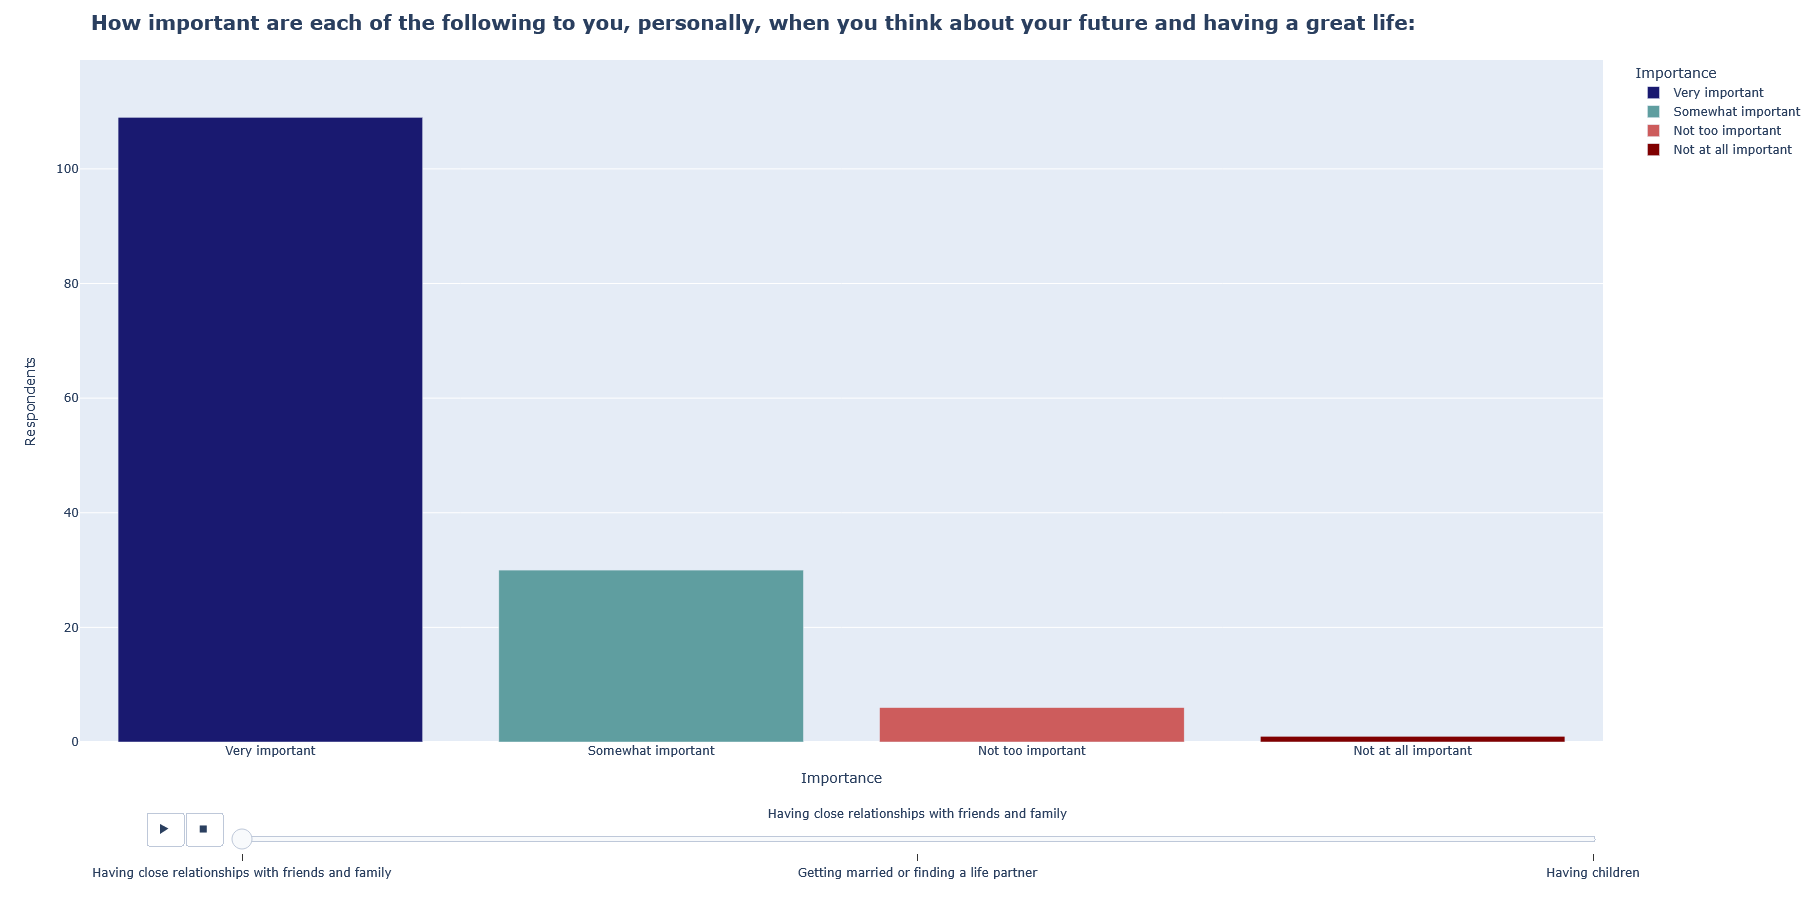

In [17]:
max_y = new_df['Value'].max() + 10 # + an int , not *1.05, because is int
min_y = 0

# Making my own color map because tbh don't want to change data now to be non categorical
# https://plotly.com/python/css-colors/
color_map = {
    "Very important": "midnightblue",
    "Somewhat important": "cadetblue",
    "Not too important": "indianred",
    "Not at all important": "maroon"
}

fig = px.bar(new_df,
             x = 'Importance',
             y = 'Value',
             color = 'Importance', # maybe change this later
             hover_name = 'Importance', # change hover to have cooler stuff later
             animation_frame = 'ShortQ',
             color_discrete_map = color_map,
             labels = {
                 'Importance':'Importance',
                 'Value':'Respondents',
                 'ShortQ':'Question'
             },
             width = 1400,
             height = 900,
             range_y = [min_y, max_y],
             hover_data = {'Importance':False,
                          'Value':True,
                          'Question':False,
                          'ShortQ':False}
)

fig.update_layout(
    title = {'text':to_slice, 'xanchor':'left', 'font':{'size':20,'weight':'bold'}}
)

# for i in [0,1,2]: # this was for demonstration purposes in an earlier milestone
#     sliders = [{'currentvalue':{'prefix':"",'xanchor':'center'}, 'active':i}]
#     fig.update_layout(sliders = sliders)

#     fig.update(data = fig.frames[i].data)
#     fig.write_image(f"famvalues_barplot{i}.png")

sliders = [{'currentvalue':{'prefix':"",'xanchor':'center'}, 'active':0}]
fig.update_layout(sliders = sliders)

fig.update(data = fig.frames[0].data)
fig.write_html(f"famvalues_barplot{0}.html")

fig.show()
             

# Other factors

In [18]:
# Economic
# Dream job 520
# Become wealthy 550
# Enough money to live comfortably 555
# Buy a house 565
# Start a business 570
# become boss or manager 575

# Dream job
# dream job pays enough to live comfortably 585
# enough to become wealthy 590
# make community better 595
# passionate about 600
# chance to learn new things 605
# travel for work 610
# manage other people 615
# creative or innovative 620


# Personal
# volunteering 525
# Good education 545
# Time for hobbies 540
# Build a life that makes you happy 560
# Good spiritual or religious life 580


# now take these numbers and below subtract 2 from each because of the way the genz csv is read in

In [19]:
    # structuring this block to potentially be reproducible for different populations or different questions
questions_list_initial = [
[520, 550, 555, 565, 570, 575],
[585, 590, 595, 600, 605, 610, 615, 620],
[525, 540, 545, 560, 580]
]

questions_list_fixed = []
for question_num_list in questions_list_initial:

    new_list = []
    for question_num in question_num_list:
        new_num = question_num - 2
        new_list.append(new_num)

    questions_list_fixed.append(new_list)
print(questions_list_fixed)


slice_string_list = ["How important are each of the following to you, personally, when you think about your future and having a great life: ",
                     "How important are each of the following to you, personally, when you think about having your dream job: ",
                    "How important are each of the following to you, personally, when you think about your future and having a great life: "
                    ]
type_name_list = ["general_econ","dream_job", "personal"]

color_map = {
    "Very important": "midnightblue",
    "Somewhat important": "cadetblue",
    "Not too important": "indianred",
    "Not at all important": "maroon"
}
for graph_num in [0,1,2]: # Three different graphs I'm trying to make here

    type_name = type_name_list[graph_num]
    print(type_name)
    question_row_list = questions_list_fixed[graph_num]
    print(question_row_list)
    # established above
    
    relevant_values_column = 'Unnamed: 13' # make sure you know before doing this if the value is a percent or count, probably counts preferred
    # established above
    
    new_df = pd.DataFrame(columns = ['Question', 'Importance', 'Value']) # creates df
    for i in question_row_list:
        question = GenZ.iloc[i]['Unnamed: 0']
        relevant_rows = [i, i+1, i+2, i+3]
        for row in relevant_rows:
            importance = GenZ.iloc[row]['Unnamed: 1']
            value = int(GenZ.iloc[row][relevant_values_column])
            new_row = pd.DataFrame({'Question':[question],'Importance':[importance],'Value':[value]})
            new_df = pd.concat([new_df, new_row], ignore_index = True)
    
    to_slice = slice_string_list[graph_num]
    print(to_slice)
    
    new_df["ShortQ"] = new_df["Question"].str.replace(to_slice, "")
    
    max_y = new_df['Value'].max() + 10 # + an int , not *1.05, because is int
    min_y = 0
    
    fig = px.bar(new_df,
                 x = 'Importance',
                 y = 'Value',
                 color = 'Importance', # maybe change this later
                 hover_name = 'Importance', # change hover to have cooler stuff later
                 animation_frame = 'ShortQ',
                 color_discrete_map = color_map,
                 labels = {
                     'Importance':'Importance',
                     'Value':'Respondents',
                     'ShortQ':'Question'
                 },
                 width = 1400,
                 height = 900,
                 range_y = [min_y, max_y],
                 hover_data = {'Importance':False,
                              'Value':True,
                              'Question':False,
                              'ShortQ':False}
    )
    
    fig.update_layout(
        title = {'text':to_slice, 'xanchor':'left', 'font':{'size':20,'weight':'bold'}}
    )
    
    sliders = [{'currentvalue':{'prefix':"",'xanchor':'center'}, 'active':0}]
    fig.update_layout(sliders = sliders)
    
    fig.update(data = fig.frames[0].data)
    
    fig.write_html(f"values_barplot_{type_name}.html")
    
    fig.show()
                 

[[518, 548, 553, 563, 568, 573], [583, 588, 593, 598, 603, 608, 613, 618], [523, 538, 543, 558, 578]]
general_econ
[518, 548, 553, 563, 568, 573]
How important are each of the following to you, personally, when you think about your future and having a great life: 


dream_job
[583, 588, 593, 598, 603, 608, 613, 618]
How important are each of the following to you, personally, when you think about having your dream job: 


personal
[523, 538, 543, 558, 578]
How important are each of the following to you, personally, when you think about your future and having a great life: 


In [20]:
slice_string_list[2]

'How important are each of the following to you, personally, when you think about your future and having a great life: '

In [21]:
for i in [0,1,2]:
    print(i)

0
1
2
